<h1 style="color:red;text-align: center";> ISAT 449 Emerging Topics in Data Science </h1>
<h2 style="color:red;text-align: center";> Lab 3: Training a Multilayer Perceptron Model using Scikit-Learn
<img   src="images/mnist.png" width=400; height=400>
<br>
<h3 style="color:red;text-align: center";> Completed by Quron Anthony








## Objectives 
- Import and learn about the MNIST dataset and its structure
- Create trianing , validation and test datasets from the MNIST data
- Build a simple but effective Scikit Learn MLPClassifier model for recognizing digits, based on looking at every pixel in the image


In [5]:

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

When one learns how to program, there's a tradition that the first thing you do is print "Hello World." Just like programming has Hello World,
machine learning has MNIST.
MNIST is a simple computer vision dataset. It consists of images of handwritten digits like these:
<img   src="images/mnist_image.png" width=400; height=400>
<br>
It also includes labels for each image, telling us which digit it is. For example, the labels for the above images are 5, 0, 4, and 1.

## Loading Data


In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mnist=fetch_openml(name='mnist_784',parser='pandas',version=1, cache=False)

## Printing the Shape

In [7]:
mnist.data.shape

(70000, 784)

There are 70,000 images and each image has 784 features (each image is 28 x 28 pixels and each pixel represents a feature of an image )

## Preprocessing Data

Each image of the MNIST dataset is encoded in a 784 dimensional vector, representing a 28 x 28 pixel image. Each pixel has a value between
0 and 255, representing the pixels intensity, from 0 (white) to 255 (black) corresponding to the grey-value of a pixel.
The above featch_mldata method to load MNIST returns data and target as uint8 which we convert to float32 and int64
respectively

In [8]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

To avoid big weights that deal with the pixel values from between [0, 255], we scale X down. A commonly used range is [0, 1]

In [9]:
X /= 255.0

In [10]:
X.min(), X.max()

(pixel1      0.0
 pixel2      0.0
 pixel3      0.0
 pixel4      0.0
 pixel5      0.0
            ... 
 pixel780    0.0
 pixel781    0.0
 pixel782    0.0
 pixel783    0.0
 pixel784    0.0
 Length: 784, dtype: float64,
 pixel1      0.000000
 pixel2      0.000000
 pixel3      0.000000
 pixel4      0.000000
 pixel5      0.000000
               ...   
 pixel780    0.243137
 pixel781    0.000000
 pixel782    0.000000
 pixel783    0.000000
 pixel784    0.000000
 Length: 784, dtype: float64)

Initial data isn't normalized

### Train/Test Split

The MNIST data is already split into a training set (the first 60,000 images) and a test set (the last 10,000 images). Furthermore, the training
set is already shuffled for us! So we can just use python list slicing to generate our datasets from the full set of images.

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Print shapes of training and testing sets 

In [12]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

### Print a selectiong of training images and their labels 

In [13]:
def plot_example(X,y):
    "Plots the first 5 images and their labels in a row"
    for i, (img,y) in enumerate(zip(X[:5].values.reshape(5,28,28),y[:5])):
        plt.subplot(151+i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

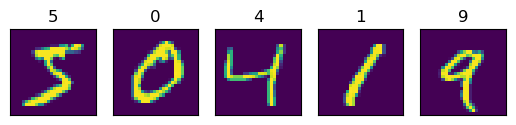

In [14]:
plot_example(X_train, y_train)

## Is the Training Dataset Balanced?
Let's plot a histogram of the training dastset labels class labels to make sure we have a balanaced dataset, i.e.we want to figure out how often
each number is represented in the training dataset This is important when we are trying to eliminate algorithmic bias in our machine learning
models.

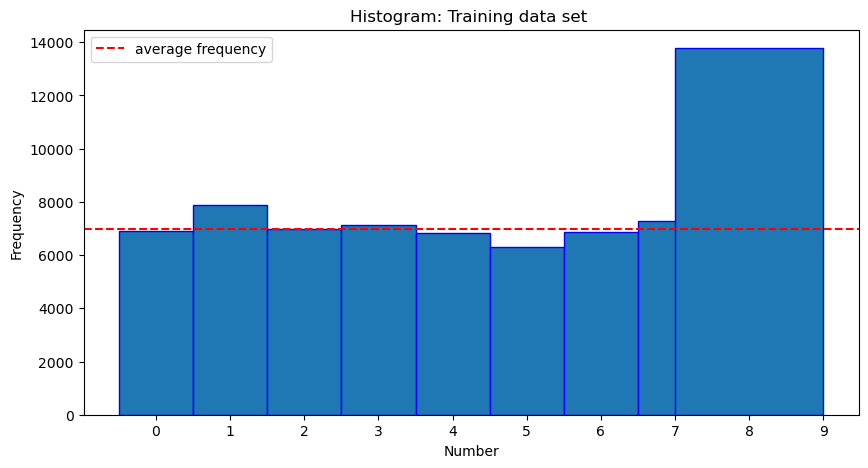

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.hist(y,bins=[0,1,2,3,4,5,6,7,8,10], edgecolor='b', histtype='bar',align='left')
ax.set_title('Histogram: Training data set ')
ax.set(xlabel='Number', ylabel='Frequency')
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9]);
ax.axhline(y=(y.size/10), label="average frequency", linestyle='dashed', color='r')
ax.legend()

We can see the number of examples for each number to detect is not even distributed. There are more 1, 3 and 7 in the dataset.

# Build Neural Network with Scikit Learn MultiLayer Perceptron Classifier
Let's build a simple, fully connected neural network with three hidden layers with the following parameters

## The Model using a Multilayer Perceptron Classifier

### Build the model with 3 hidden layers as follows:
- hidden layer = 256 neurons 
- hidden layer = 128 neurons 
- hidden layer = 32 neurons 
### also, use these parameters
- solver ='adam'
- learning_rate_init= 0.001
- tol=1e-2
- max_iter= 500
- verbose = True
- random_state=1

You can use the default values for the rest of the parameters

Input layer has 784 dimensions (28x28), and the output layer 10 neurons, representing digits 0 - 9. The MLPClassifier implements a multi-layer
perceptron (MLP) algorithm that trains using Backpropagation. MLP trains on two arrays: array X of size (n_samples, n_features), which holds
the training samples represented as floating point feature vectors; and array y of size (n_samples,), which holds the target values (class labels)
for the training samples:

In [18]:
from sklearn.neural_network import MLPClassifier

mlp_mnist_model = MLPClassifier(hidden_layer_sizes=(256,128,32),max_iter=500,
                                alpha=0.001, solver='adam', random_state= 0, verbose = True,
                                 tol = 1e-2)

In [20]:
mlp_mnist_model.fit(X_train, y_train)

Iteration 1, loss = 0.32641733
Iteration 2, loss = 0.12041517
Iteration 3, loss = 0.07933066
Iteration 4, loss = 0.05766777
Iteration 5, loss = 0.04235462
Iteration 6, loss = 0.03501749
Iteration 7, loss = 0.02648700
Iteration 8, loss = 0.02184988
Iteration 9, loss = 0.02045885
Iteration 10, loss = 0.01520554
Iteration 11, loss = 0.01829864
Iteration 12, loss = 0.01473310
Iteration 13, loss = 0.01348581
Iteration 14, loss = 0.01180062
Iteration 15, loss = 0.01494752
Iteration 16, loss = 0.01208354
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(alpha=0.001, hidden_layer_sizes=(256, 128, 32), max_iter=500,
              random_state=0, tol=0.01, verbose=True)

In [22]:
mlp_mnist_model.out_activation_

'softmax'

In [23]:
mlp_mnist_model.n_layers_

5

In [24]:
mlp_mnist_model.n_outputs_

10

In [27]:
mlp_mnist_model.n_iter_

16

## Model Evaluation and Performance

In [28]:
mlp_mnist_model.score(X_test,y_test)

0.9763

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
y_pred = mlp_mnist_model.predict(X_test)

In [31]:
accuracy_score(y_test,y_pred)

0.9763

An accuracy of about 98% for a network with only two hidden layers is not too bad.
Let's take a look at some predictions that went wrong:

In [32]:
error_mask = y_pred != y_test

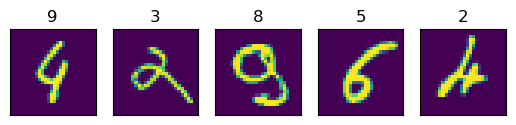

In [33]:
plot_example(X_test[error_mask], y_pred[error_mask])

In [34]:
loss_values = mlp_mnist_model.loss_curve_

In [35]:
print('loss values {}'.format(loss_values))

loss values [0.3264173316902989, 0.12041516730826347, 0.07933066092128772, 0.05766777302716615, 0.042354615136189176, 0.035017489035687036, 0.02648699879294936, 0.021849875616251548, 0.020458845443001732, 0.015205535830941384, 0.018298636794955154, 0.014733096914412507, 0.013485808548779886, 0.01180061705129146, 0.014947516696318375, 0.012083542503241028]


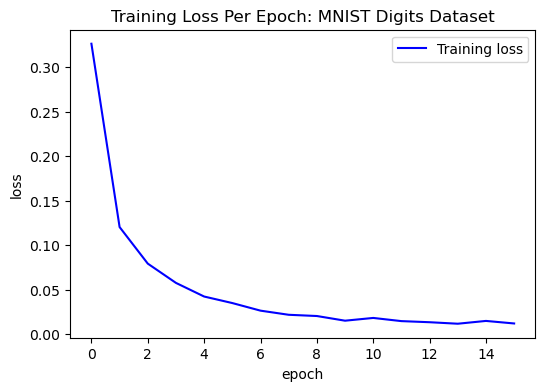

In [36]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
plt.plot(loss_values, color='blue', label = 'Training loss')
plt.xlabel('epoch')
plt.ylabel('loss');
#Legend
plt.legend(loc='upper right')
#Title
plt.title('Training Loss Per Epoch: MNIST Digits Dataset')
#This shows the plot
plt.show()

### Classification Report

In [37]:
from sklearn import metrics 
print('Classification Report:')
print(metrics.classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.96      0.99      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.96      0.98       982
           5       0.95      0.98      0.96       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.95      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Confusion Matrix
A further statistic is the confusion matrix that shows the errors that the classifier made during training

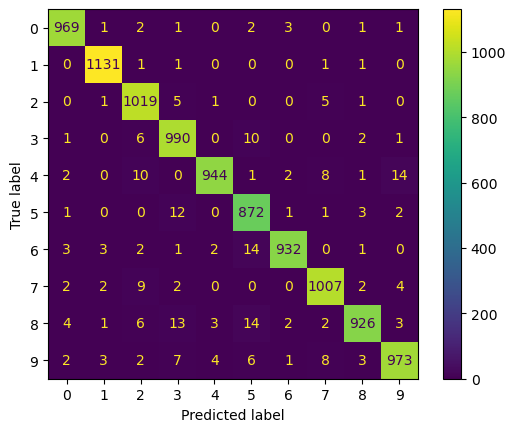

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
disp.plot()
plt.show()

## Exercise 1
Based on the confusion matrix, which digit was hardest for the model to classify? Justify your answer!

Based from the confusion 